In [49]:
#libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor


In [50]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [51]:
df.shape

(1460, 81)

We have 81 columns and 1460 records. This means we have 80 features, excluding the target, "SalesPrice". Here is a list and description of all the features present in our database:

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale (*link it to a seperate text/ md file*)

Let's get a list of all the features. We also want gto find out those that have missing values and the data type of each column.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

A couple of columns have missing values. Some, a high percentage. Let's find out which columns have missing values, what percentage?- a percentage of 50 and above.

In [67]:
missing_percent = df.columns[((df.isnull().sum() / len(df)) * 100) >= 40]
missing_percent

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

We want to drop this columns since they do not have enough data.  **Its important that we take note of the dropped columns, just in case we need to reference them for anything. also ask ourselves how relevant would these have been to prediction and why is the most likely reason as to why this info wasnt collcted effectively--reccomendations?** -this document contains a log of all dropped columns

In [69]:
df1 = df.drop(columns=['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'])
df1.shape

(1460, 75)

We now have 76 columns in our dataset.

check for cardinality in the categorical columns:

In [55]:
df1.select_dtypes(include="object").nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

Some descriptions seem vague..e.g. GD? a score would be better?

Let's remove duplicates:

In [56]:
df1 = df1.drop_duplicates()
df1.shape

(1460, 76)

The shape remains the same indicating that there were no duplicates in our dataset

Look at the distribution of our target variable:


(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

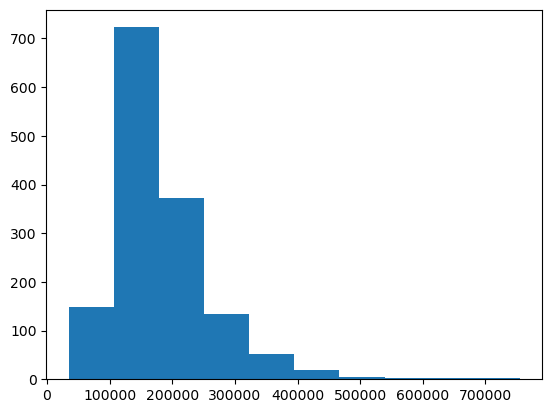

In [44]:
plt.hist(df1["SalePrice"])

Skewed to the right. Most house prices fall between

In [ ]:
plt.boxplot(df1["SalePrice"])

Let's first quickly fit a random forest regressor to extract feature importance and select relevant features:
- we wont split coz only interested in feature importance and not model evaluation
- use pd.get_dummies instead of onehot encoder- quick conversion

In [70]:
df1_nul=df1.dropna()

In [71]:
df1_nul.shape

(1094, 75)

In [74]:
# Encode categorical variables
df_encoded = pd.get_dummies(df1_nul)

# Define X and y
X = df_encoded.drop(columns=['SalePrice', 'Id'])  # Features
y = df_encoded['SalePrice']  # Target

# Train a random forest regressor to get feature importances
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Combine feature names and their importances into a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                 Feature  Importance
3            OverallQual    0.607358
15             GrLivArea    0.096475
13              2ndFlrSF    0.047318
8             BsmtFinSF1    0.026488
11           TotalBsmtSF    0.023229
..                   ...         ...
174          BsmtCond_Po    0.000000
120     RoofMatl_Membran    0.000000
121        RoofMatl_Roll    0.000000
131  Exterior1st_ImStucc    0.000000
94     Condition2_Artery    0.000000

[255 rows x 2 columns]


In [77]:
feature_importance_df.head(20)

,Feature,Importance
3,OverallQual,0.607358
15,GrLivArea,0.096475
13,2ndFlrSF,0.047318
8,BsmtFinSF1,0.026488
11,TotalBsmtSF,0.023229
18,FullBath,0.019993
12,1stFlrSF,0.019673
2,LotArea,0.011043
26,GarageArea,0.010302
22,TotRmsAbvGrd,0.010099


In [64]:
from sklearn.impute import SimpleImputer

# Handle missing values
# Impute missing values in numerical columns
numerical_imputer = SimpleImputer(strategy='mean')
df_imputed= pd.DataFrame(numerical_imputer.fit_transform(df1.select_dtypes(include="number")), columns=df1.columns)

# Impute missing values in categorical columns using 'most_frequent'
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(categorical_imputer.fit_transform(df1.select_dtypes(include="object")), columns=df1.columns)


# Fit and transform the dataset
#df_imputed = pd.DataFrame(imputer.fit_transform(df1), columns=df1.columns)




ValueError: Shape of passed values is (1460, 38), indices imply (1460, 76)

In [29]:
len(ohe.get_feature_names_out())

9011

In [23]:
X_train

<1460x9011 sparse matrix of type '<class 'numpy.float64'>'
	with 83362 stored elements in Compressed Sparse Row format>

In [24]:
importances = pd.Series(rf.feature_importances_, index=ohe.get_feature_names_out())
important_features = importances.nlargest(20).index  # Select top 20 features
#X_train_reduced = X_train[important_features]

In [27]:
importances[:20]

Id_2     3.050467e-10
Id_3     0.000000e+00
Id_4     1.665119e-05
Id_5     2.004341e-07
Id_6     2.951673e-09
Id_7     1.808567e-08
Id_8     1.380526e-07
Id_9     0.000000e+00
Id_10    1.887410e-09
Id_11    3.016552e-10
Id_12    4.199350e-05
Id_13    2.129103e-09
Id_14    1.503571e-06
Id_15    9.075177e-07
Id_16    6.606019e-09
Id_17    3.189204e-10
Id_18    6.994193e-07
Id_19    3.798391e-08
Id_20    0.000000e+00
Id_21    4.048018e-06
dtype: float64

In [22]:
importances = pd.Series(rf.feature_importances_, index=X_train.columns)

AttributeError: columns not found

In [17]:
type(df_ohe)

scipy.sparse._csr.csr_matrix